In [21]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/rossmann/'

In [22]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

### collapse

In [23]:
for t in tables: display(t.sample(5))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
399219,187,4,2014-07-10,5763,779,1,0,0,0
106098,174,1,2015-04-27,6796,540,1,1,0,0
352481,202,5,2014-08-29,5205,473,1,0,0,1
590360,196,6,2014-01-18,3433,529,1,0,0,0
410024,490,7,2014-06-29,0,0,0,0,0,0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
212,213,d,c,4030.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct"
319,320,a,c,210.0,9.0,2012.0,0,NaN,NaN,NaN
152,153,a,a,16240.0,10.0,2000.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
64,65,a,c,13840.0,5.0,2010.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
57,58,a,c,7340.0,5.0,2008.0,1,27.0,2012.0,"Jan,Apr,Jul,Oct"


,Store,State
957,958,BE
851,852,HE
663,664,ST
1020,1021,BE
683,684,BY


,StateName,State
11,Saarland,SL
15,Thueringen,TH
3,Brandenburg,BB
6,Hessen,HE
1,Bayern,BY


,file,week,trend
1118,Rossmann_DE_BW,2014-06-29 - 2014-07-05,76
1920,Rossmann_DE_HH,2015-09-06 - 2015-09-12,62
1891,Rossmann_DE_HH,2015-02-15 - 2015-02-21,60
891,Rossmann_DE_RP,2012-12-23 - 2012-12-29,28
1529,Rossmann_DE_HE,2013-11-10 - 2013-11-16,57


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
11032,Berlin,2013-05-23,15,9,3,4,1,-3,87,56,20,1009,1008,1006,31.0,15.0,10.0,23,14,NaN,0.00,2.0,NaN,252
5302,SachsenAnhalt,2013-12-19,8,5,2,6,3,0,88,78,66,1015,1010,1006,31.0,18.0,11.0,21,11,NaN,0.51,8.0,Rain,-1
11631,Berlin,2015-01-12,8,4,2,6,4,2,95,88,74,1014,1012,1009,31.0,12.0,6.0,35,27,52.0,3.05,7.0,Rain,236
14071,Thueringen,2013-07-31,22,19,16,16,14,13,100,73,51,1020,1018,1016,31.0,11.0,3.0,32,18,NaN,0.00,5.0,Rain,243
10275,BadenWuerttemberg,2014-01-11,7,2,-3,6,2,-2,100,96,79,1025,1019,1016,19.0,10.0,6.0,21,5,NaN,3.05,6.0,Fog-Rain,318


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
13212,13213,488,3,2015-09-02,1.0,1,0,0
40727,40728,642,6,2015-08-01,1.0,0,0,0
2079,2080,481,2,2015-09-15,1.0,1,0,0
25258,25259,563,3,2015-08-19,1.0,1,0,0
6935,6936,117,3,2015-09-09,1.0,0,0,0


In [24]:
tables[0].sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
160173,729,2,2015-03-10,9371,999,1,0,0,0
263937,528,2,2014-12-02,14313,1045,1,1,0,0
910025,971,7,2013-04-07,0,0,0,0,0,0
928189,180,4,2013-03-21,7684,888,1,1,0,0
278268,896,1,2014-11-17,6900,1102,1,0,0,0


In [25]:
for t in tables: display(DataFrameSummary(t).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


,StateName,State
count,16,16
unique,16,16
top,Hamburg,"HB,NI"
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,50.1586,1018.53,1015.3,1012.31,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,19.9602,7.78872,8.12331,8.60058,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,4,976,974,970,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,34,1014,1010,1007,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,49,1019,1016,1013,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,66,1024,1021,1018,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,100,1043,1040,1038,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,93,67,67,69,24,32,24,44,29,47,41,9,21,362


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088,41088,41088,NaN,41077,41088,NaN,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802
min,1,1,1,NaN,0,0,NaN,0
25%,10272.8,279.75,2,NaN,1,0,NaN,0
50%,20544.5,553.5,4,NaN,1,0,NaN,0
75%,30816.2,832.25,6,NaN,1,1,NaN,1
max,41088,1115,7,NaN,1,1,NaN,1
counts,41088,41088,41088,41088,41077,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2


In [26]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [27]:
len(train),len(test)

(1017209, 41088)

In [28]:
train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
711566,982,3,2013-10-02,6378,659,1,0,0,0
36797,3,7,2015-06-28,0,0,0,0,0,0
239657,564,7,2014-12-28,0,0,0,0,0,0
230503,814,2,2015-01-06,11005,802,1,1,0,0
17589,865,4,2015-07-16,7545,616,1,1,0,1


In [29]:
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'



join_df is a function for joining tables on specific fields.

In [30]:
int(True)

1

In [31]:
pd.options.display.max_columns=39

In [32]:
weather.sample(5)[1:2][:]

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
3427,Bremen,2014-04-03,19,12,5,10,8,5,100,72,44,1006,1005,1003,19.0,10.0,3.0,26,11,NaN,0.0,NaN,Fog,53


In [33]:
weather.sample(5)

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
7898,Hessen,2015-08-27,29,21,14,18,14,11,94,64,26,1013,1011,1008,31.0,11.0,10.0,32,8,NaN,0.0,6.0,Rain,234
2031,Bayern,2013-02-21,-2,-4,-6,-5,-7,-10,100,82,64,1018,1015,1013,10.0,9.0,4.0,24,14,NaN,0.0,7.0,Snow,48
2454,Bayern,2014-04-20,16,11,7,8,6,4,93,71,51,1008,1006,1005,10.0,9.0,5.0,32,16,NaN,0.0,4.0,Fog,77
5400,SachsenAnhalt,2014-03-27,14,7,0,3,2,1,95,58,31,1020,1018,1016,31.0,19.0,6.0,14,10,NaN,0.0,8.0,NaN,-1
14434,Thueringen,2014-07-29,24,20,16,19,18,15,100,84,59,1011,1009,1006,31.0,11.0,0.0,19,8,NaN,0.0,6.0,Fog-Rain-Thunderstorm,12


In [34]:
state_names.sample(5)

,StateName,State
14,SchleswigHolstein,SH
4,Bremen,HB
11,Saarland,SL
1,Bayern,BY
5,Hamburg,HH


In [35]:
weather = weather.merge(state_names,how='left',left_on="file",right_on="StateName",
                         suffixes=("","x"))

<h2> Shape of Weather is : ,39 </h2>

In [36]:
np.shape(weather)

(15840, 26)

<h2> Table Names - train, store, store_states, state_names, googletrend, weather, test </h2>

<h2>Making new colums in google trends</h2>

In [37]:
googletrend.sample(5)

,file,week,trend
774,Rossmann_DE_BE,2013-07-28 - 2013-08-03,88
580,Rossmann_DE_TH,2015-07-12 - 2015-07-18,83
829,Rossmann_DE_BE,2014-08-17 - 2014-08-23,77
1097,Rossmann_DE_BW,2014-02-02 - 2014-02-08,61
1701,Rossmann_DE_ST,2014-04-27 - 2014-05-03,68


In [38]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State']=googletrend.file.str.split('_',expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [39]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

In [40]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [41]:
trend_de.sample(5)

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
229,Rossmann_DE,2014-06-22 - 2014-06-28,62,2014-06-22,None,2014,6,25,22,6,173,False,False,False,False,False,False,1403395200
221,Rossmann_DE,2014-04-27 - 2014-05-03,74,2014-04-27,None,2014,4,17,27,6,117,False,False,False,False,False,False,1398556800
284,Rossmann_DE,2015-07-12 - 2015-07-18,86,2015-07-12,None,2015,7,28,12,6,193,False,False,False,False,False,False,1436659200
238,Rossmann_DE,2014-08-24 - 2014-08-30,66,2014-08-24,None,2014,8,34,24,6,236,False,False,False,False,False,False,1408838400
247,Rossmann_DE,2014-10-26 - 2014-11-01,63,2014-10-26,None,2014,10,43,26,6,299,False,False,False,False,False,False,1414281600


In [42]:
store.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
681,682,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
669,670,a,a,2060.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
683,684,d,c,680.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
901,902,a,a,310.0,5.0,2015.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN


In [43]:
store_states.sample(5)

,Store,State
996,997,HE
663,664,ST
8,9,NW
287,288,BY
669,670,BY


In [44]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [45]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [46]:
joined = join_df(train, store, "Store")

In [47]:
store_states.sample(5)

,Store,State
937,938,"HB,NI"
406,407,BY
518,519,SH
1028,1029,ST
906,907,NW


In [48]:
store.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
309,310,a,c,2290.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec",SH
888,889,d,a,18670.0,12.0,2005.0,0,NaN,NaN,NaN,ST
715,716,d,a,3200.0,1.0,2008.0,1,22.0,2011.0,"Jan,Apr,Jul,Oct",BY
424,425,d,c,1460.0,NaN,NaN,0,NaN,NaN,NaN,NW
561,562,b,c,1210.0,NaN,NaN,0,NaN,NaN,NaN,"HB,NI"


In [49]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [50]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [51]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [52]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [53]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [54]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [55]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [56]:
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [57]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [58]:
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [59]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [60]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

In [61]:
joined.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,...,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks
373150,318,4,2014-08-07,7642,682,1,1,False,1,2014,8,32,7,3,219,False,False,False,False,...,1015,1014,31.0,16.0,4.0,21,8,NaN,9.91,6.0,Rain-Thunderstorm,83,Sachsen,2014-03-15,145,4,1900-01-01,0,0
864308,969,6,2013-05-18,2325,426,1,0,False,0,2013,5,20,18,5,138,False,False,False,False,...,1007,1005,31.0,12.0,10.0,19,6,NaN,0.00,4.0,NaN,137,BadenWuerttemberg,1999-11-15,4933,24,2013-03-04,75,10
247609,10,5,2014-12-19,6922,710,1,1,False,0,2014,12,51,19,4,353,False,False,False,False,...,1008,1005,19.0,8.0,3.0,35,27,55.0,6.10,6.0,Rain,251,Niedersachsen,2009-09-15,1921,24,1900-01-01,0,0
152414,775,2,2015-03-17,8550,569,1,1,False,0,2015,3,12,17,1,76,False,False,False,False,...,1023,1022,NaN,NaN,NaN,27,14,NaN,0.00,NaN,NaN,77,Bayern,2005-12-15,3379,24,2011-05-30,1387,25
428973,484,4,2014-06-12,6426,641,1,0,False,0,2014,6,24,12,3,163,False,False,False,False,...,1025,1023,31.0,12.0,3.0,21,10,NaN,0.00,3.0,NaN,283,SchleswigHolstein,2011-03-15,1185,24,1900-01-01,0,0


## Durations

In [62]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [63]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [64]:
df = train[columns]

In [65]:
df = test[columns]

In [66]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [67]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [68]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [69]:
df = df.set_index("Date")

In [70]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [71]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [72]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [73]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [74]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [75]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [76]:
df.reset_index(inplace=True)

In [77]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [78]:
df.drop(columns,1,inplace=True)

In [79]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,0,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,0,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,0,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [80]:
df.to_feather(f'{PATH}df')

In [81]:
df = pd.read_feather(f'{PATH}df')

In [82]:
df["Date"] = pd.to_datetime(df.Date)

In [83]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [84]:
joined = join_df(joined, df, ['Store', 'Date'])

In [85]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [86]:
joined = joined[joined.Sales!=0]

In [87]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [88]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

## Create features

In [89]:
joined = pd.read_feather(f'{PATH}joined')
joined_test = pd.read_feather(f'{PATH}joined_test')

In [90]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [91]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [92]:
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

apply_cats(joined_test, joined)

for v in contin_vars:
    joined[v] = joined[v].astype('float32')
    joined_test[v] = joined_test[v].astype('float32')

We're going to run on a sample.

In [93]:
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index("Date")
samp_size = len(joined_samp); samp_size

150000

To run on the full dataset, use this instead:

In [94]:
samp_size = n
joined_samp = joined.set_index("Date")

We can now process our data...

In [95]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,NaN,2008,1900,HE,31,Fog,NaN,NaN,NaN,NaN,NaN,NaN,1270.0,23.0,16.0,8.0,98.0,54.0,18.0,24.0,11.0,1.0,85.0,83.0,NaN,NaN,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,"Jan,Apr,Jul,Oct",2007,2010,TH,31,Fog,NaN,NaN,NaN,NaN,NaN,NaN,570.0,19.0,13.0,7.0,100.0,62.0,25.0,14.0,11.0,4.0,80.0,83.0,NaN,NaN,1.0,1.0,6064


In [96]:
joined_samp['AfterStateHoliday']=joined_samp['AfterStateHoliday'].fillna(0)
joined_samp['BeforeStateHoliday']=joined_samp['BeforeStateHoliday'].fillna(0)

In [97]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True)
yl = np.log(y)

In [98]:
joined_test = joined_test.set_index("Date")

In [99]:
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [100]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,...,SchoolHoliday_bw,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,CompetitionDistance_na,CloudCover_na
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,0,16,1,5,31,1,0,0,0,...,0,-0.535827,1.008113,0.806978,0.317856,0.614244,-1.507606,-1.620066,0.149027,-0.142774,-2.805667,1.732492,1.724334,0.0,0.0,1.113717,2.04105,-0.050948,-0.29609
2015-07-31,2,5,3,7,31,1,25,26,1,1,2,15,3,12,31,1,0,0,0,...,0,-0.625558,0.538548,0.394117,0.163376,0.873262,-0.902093,-1.264031,-0.960613,-0.142774,-0.961766,1.294578,1.724334,0.0,0.0,1.113717,2.04105,-0.050948,-0.29609


In [102]:
## DLtrain_ratio = 0.75
train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

An even better option for picking a validation set is using the exact same length of time period as the test set uses - this is implemented here:

In [103]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [104]:
val_idx=[0]

## DL

In [105]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [106]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [107]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [108]:
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 1),
 ('Promo_bw', 1),
 ('StateHoliday_fw', 1),
 ('StateHoliday_bw', 1),
 ('SchoolHoliday_fw', 1),
 ('SchoolHoliday_bw', 1)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [109]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [110]:
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1)]

In [111]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [112]:
m.lr_find()

 60%|█████▉    | 3930/6597 [02:43<01:50, 24.04it/s, loss=0.483] 

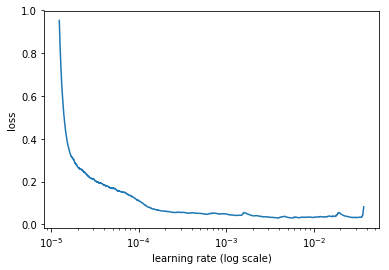

In [113]:
m.sched.plot(100)

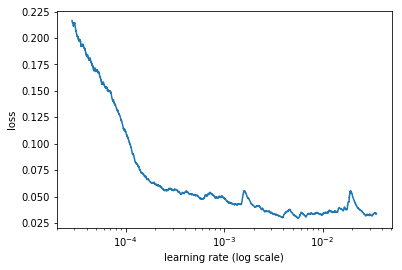

 60%|█████▉    | 3930/6597 [03:00<02:02, 21.83it/s, loss=0.483]

In [114]:
m.sched.plot(n_skip=500, n_skip_end=30)

### Sample

In [89]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [90]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.015739   0.0        0.000126  
 84%|████████▍ | 5544/6597 [05:05<00:58, 18.15it/s, loss=0.0114]

KeyboardInterrupt: 

 84%|████████▍ | 5544/6597 [05:20<01:00, 17.32it/s, loss=0.0114]

In [ ]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

In [ ]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

### All

In [115]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [!1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [116]:
m.fit(lr, 1, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.013963   7.3e-05    0.008606  


[array([0.00007]), 0.00860554908908337]

In [ ]:
m.fit(lr, 3, metrics=[exp_rmspe])

In [118]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=2)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.009228   0.002726   0.05087   
    1      0.008263   1e-06      0.000763                        
    2      0.008516   0.006769   0.085751                        
    3      0.007368   0.003131   0.057547                        
    4      0.008081   5.8e-05    0.007615                        
    5      0.006245   0.001258   0.0361                          


[array([0.00126]), 0.03609959099673205]

### Test

In [172]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [173]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.014125   0.009788   0.103991  
    1      0.01025    0.000119   0.010829                       
    2      0.009337   0.000527   0.023217                        


[array([0.00053]), 0.023216503291080177]

In [ ]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=2)

100%|█████████▉| 6596/6597 [04:49<00:00, 22.82it/s, loss=0.00767]

In [175]:
m.save('val0')

In [176]:
m.load('val0')

In [177]:
x,y=m.predict_with_targs()

In [178]:
 exp_rmspe(x,y)

0.0200690704704678

In [179]:
pred_test=m.predict(True)

In [180]:
pred_test = np.exp(pred_test)

In [181]:
joined_test['Sales']=pred_test

In [182]:
csv_fn=f'{PATH}tmp/sub.csv'

In [183]:
joined_test[['Id','Sales']].to_csv(csv_fn, index=False)

In [184]:
FileLink(csv_fn)

/Users/ssss/Downloads/fastai-master/courses/dl1/data/rossmann/tmp/sub.csv

## RF

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [153]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [154]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.9799520464753252, 0.0, 0.9162951214656377, 0.030483395818497558)

In [143]:
x,y=m.predict_with_targs()